In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import os

os.makedirs('visuals', exist_ok=True)
os.makedirs('reports', exist_ok=True)

In [2]:
df = pd.read_csv(r"C:\Users\neman\Desktop\Zara Customer Segmentation Using K means\cleaned_data.csv")                   
df_human = pd.read_excel(r"C:\Users\neman\Desktop\Zara Customer Segmentation Using K means\cleaned_data_human_readable.xlsx")

print("Data loaded successfully. Shape of final data:", df.shape)

Data loaded successfully. Shape of final data: (20252, 38)


In [3]:
# Handle any NaN (safe precaution)
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Re-run K-Means (exact same as Member 2 for consistency)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_imputed)

# Add clusters to human-readable
df_human['Cluster'] = clusters

# Save clustered data
df_human.to_excel('reports/clustered_data_human_readable.xlsx', index=False)
print("Saved clustered human-readable data in reports")

Saved clustered human-readable data in reports


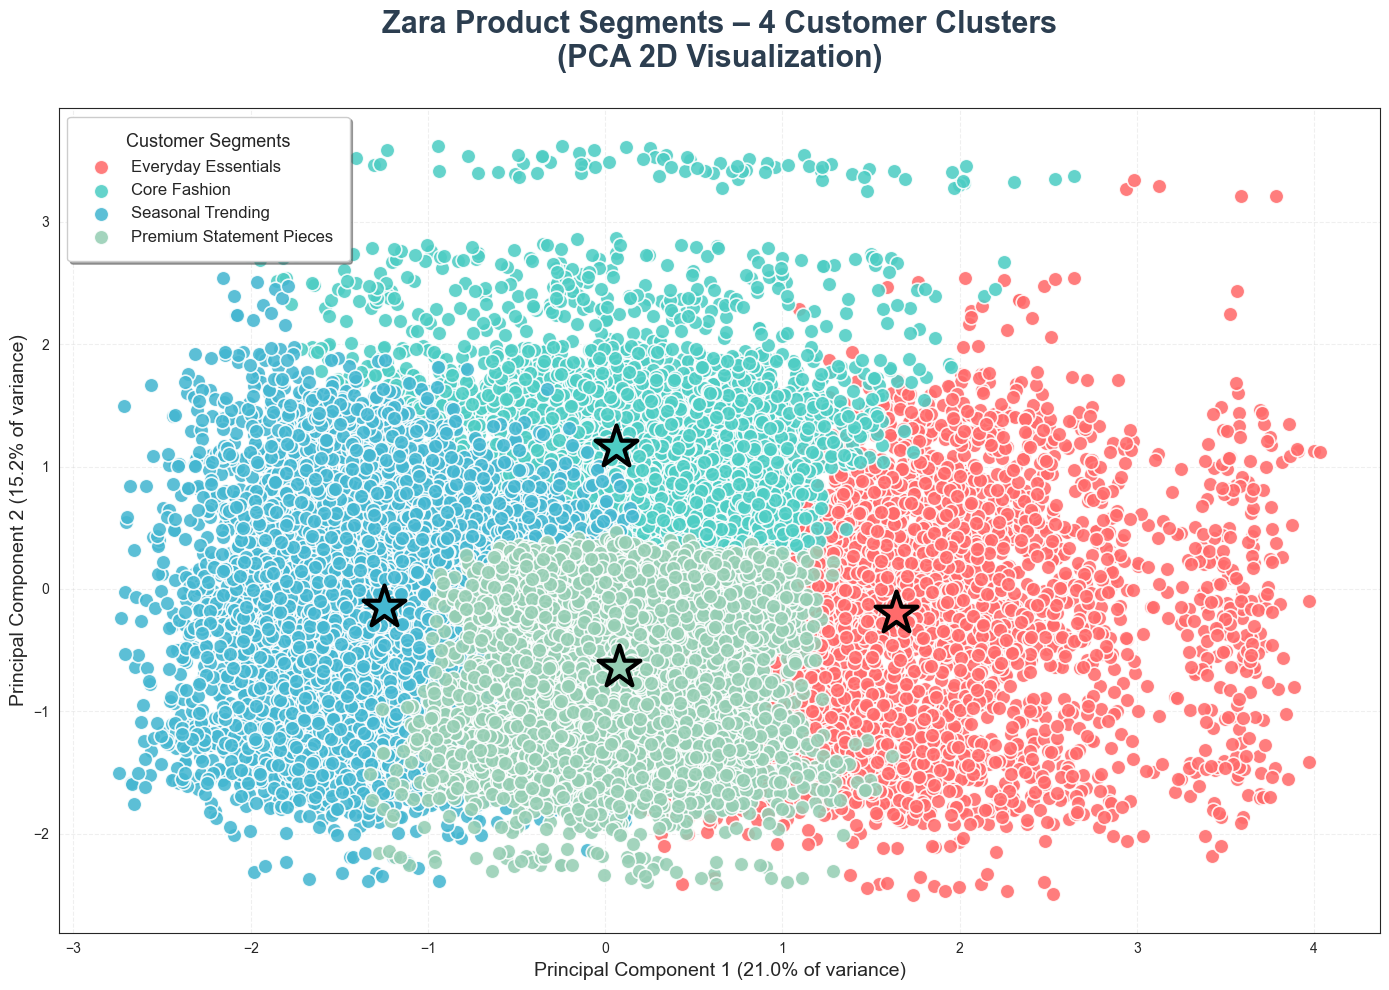

SUCCESS!


In [8]:
X_array = df_imputed.values

pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(X_array)

# Beautiful colors & names
colors = ["#FF6B6B", "#4ECDC4", "#45B7D1", "#96CEB4"]
names  = ["Everyday Essentials", "Core Fashion", "Seasonal Trending", "Premium Statement Pieces"]

plt.figure(figsize=(14, 10))

# Plot each cluster
for i in range(4):
    mask = (clusters == i)
    plt.scatter(pca_components[mask, 0], pca_components[mask, 1],
                color=colors[i], s=110, alpha=0.88, edgecolors='white', linewidth=1.2,
                label=names[i], zorder=3)

    # Cluster center as big star (transform using the same array method)
    center_original = kmeans.cluster_centers_[i].reshape(1, -1)
    center_2d = pca.transform(center_original)[0]
    plt.scatter(center_2d[0], center_2d[1],
                color=colors[i], marker='*', s=1000,
                edgecolors='black', linewidth=3, zorder=6)

# Styling
plt.title('Zara Product Segments – 4 Customer Clusters\n(PCA 2D Visualization)',
          fontsize=22, fontweight='bold', color='#2c3e50', pad=30)
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.1%} of variance)', fontsize=14)
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.1%} of variance)', fontsize=14)

# Beautiful legend
plt.legend(title="Customer Segments", title_fontsize=13, fontsize=12,
           loc="upper left", frameon=True, fancybox=True, shadow=True, borderpad=1)

plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()

# Save perfectly
plt.savefig('visuals/PCA_CLUSTERS.png', dpi=300, bbox_inches='tight')
plt.savefig('visuals/PCA_CLUSTERS.pdf', bbox_inches='tight')
plt.show()

print("SUCCESS!")

In [10]:
recommendations = pd.DataFrame({
    'Customer Segment': [
        'Everyday Essentials',
        'Core Fashion',
        'Seasonal Trending',
        'Premium Statement Pieces'
    ],
    'Key Characteristics': [
        'Low price, high sales volume, short description, basic materials',
        'Medium price & sales, balanced across seasons and categories',
        'Promoted items, seasonal focus, end-of-aisle placement',
        'Highest price, longest descriptions, premium materials (wool, leather)'
    ],
    'Recommended Marketing Strategy': [
        'Heavy discounts, flash sales, bundle offers, social media ads, email blasts',
        'Influencer partnerships, mid-season campaigns, Instagram/TikTok focus',
        'Limited-time offers, "New Arrival" highlights, countdown promotions',
        'VIP early access, storytelling campaigns, lookbooks, minimal/no discounts'
    ],
    'Priority Channel': [
        'Mass email + Instagram Reels + Bundles',
        'Instagram & TikTok influencers',
        'Website banners + Email urgency',
        'Exclusive newsletter + Lookbook + In-store events'
    ]
})

# Save it
recommendations.to_excel('reports/marketing_recommendations_final.xlsx', index=False)

# Display beautifully in notebook
print("MARKETING RECOMMENDATIONS – FINAL VERSION")
display(recommendations.style\
    .set_table_attributes('style="width: 90%; margin: 20px auto;"')\
    .set_caption("Actionable Marketing Strategies by Customer Segment")\
    .set_properties(**{'font-size': '13pt', 'text-align': 'left'})\
    .set_table_styles([
        {'selector': 'caption', 'props': [('color', 'navy'), ('font-size', '16pt'), ('font-weight', 'bold')]},
        {'selector': 'th', 'props': [('background-color', '#4ECDC4'), ('color', 'white'), ('font-weight', 'bold')]},
        {'selector': 'td', 'props': [('padding', '12px'), ('border', '1px solid #ddd')]}
    ]))

print("\nSaved → reports/marketing_recommendations_final.xlsx")

MARKETING RECOMMENDATIONS – FINAL VERSION


,Customer Segment,Key Characteristics,Recommended Marketing Strategy,Priority Channel
0,Everyday Essentials,"Low price, high sales volume, short description, basic materials","Heavy discounts, flash sales, bundle offers, social media ads, email blasts",Mass email + Instagram Reels + Bundles
1,Core Fashion,"Medium price & sales, balanced across seasons and categories","Influencer partnerships, mid-season campaigns, Instagram/TikTok focus",Instagram & TikTok influencers
2,Seasonal Trending,"Promoted items, seasonal focus, end-of-aisle placement","Limited-time offers, ""New Arrival"" highlights, countdown promotions",Website banners + Email urgency
3,Premium Statement Pieces,"Highest price, longest descriptions, premium materials (wool, leather)","VIP early access, storytelling campaigns, lookbooks, minimal/no discounts",Exclusive newsletter + Lookbook + In-store events



Saved → reports/marketing_recommendations_final.xlsx
